In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\program files\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\program files\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib as plt

In [7]:
macro_scenarios = pd.read_csv("E:/Hackathon/macro_scenarios.csv")
static_client_data = pd.read_csv("E:/Hackathon/static_client_data.csv")
target_data = pd.read_csv("E:/Hackathon/target_data.csv")
time_series_data = pd.read_csv("E:/Hackathon/time_series_data.csv")

In [10]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 11.1/11.1 MB 58.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\program files\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\program files\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\Shivali\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Shivali\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Shivali\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.52
Confusion Matrix:
 [[   0  393    0]
 [   0 1039    0]
 [   0  568    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       393
           1       0.52      1.00      0.68      1039
           2       0.00      0.00      0.00       568

    accuracy                           0.52      2000
   macro avg       0.17      0.33      0.23      2000
weighted avg       0.27      0.52      0.36      2000



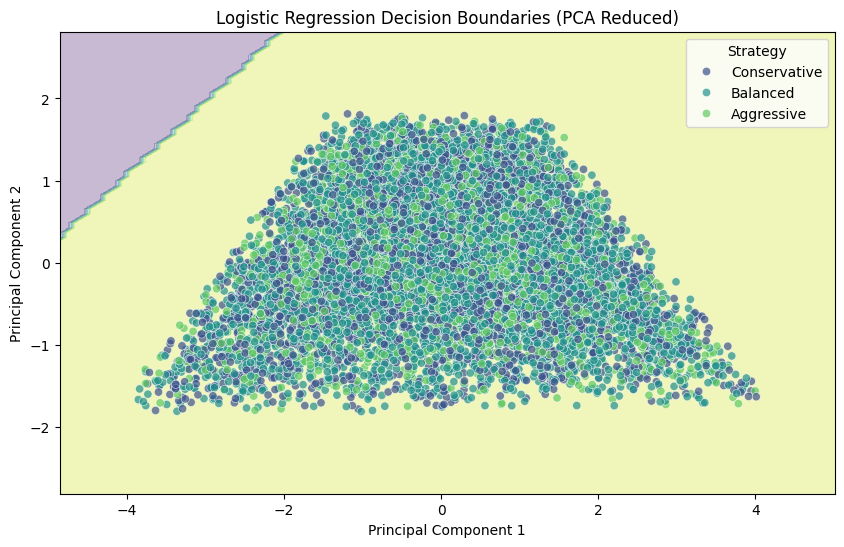

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant features for classification
features = ["forecasted_value_year_1", "forecasted_value_year_2", "forecasted_value_year_3"]
X = target_data[features]
y = target_data["recommended_strategy"]

# Encode categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Converts labels to 0, 1, 2

# Standardize features for PCA and logistic regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Train logistic regression model
log_reg = LogisticRegression(multi_class='ovr', solver='liblinear')
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

# Decision Boundary Visualization using PCA-transformed features
plt.figure(figsize=(10, 6))
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = log_reg.predict(scaler.inverse_transform(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])))
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', alpha=0.7)
plt.title("Logistic Regression Decision Boundaries (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Strategy")
plt.show()


In [ ]:
### 1. Check Missing Values
missing_values = static_client_data.isnull().sum()
print("Missing Values:\n", missing_values)

### 2. Correct Data Types
# Convert categorical columns
categorical_cols = ["gender", "employment_status", "investment_goals", "risk_appetite", "preferred_asset_classes"]
for col in categorical_cols:
    static_client_data[col] = static_client_data[col].astype("category")

# Convert integer and float columns
integer_cols = ["age", "investment_horizon_years", "dependents", "financial_knowledge_score"]
float_cols = ["annual_income", "debt_to_income_ratio", "savings_rate", "net_worth"]

static_client_data[integer_cols] = static_client_data[integer_cols].astype("int64")
static_client_data[float_cols] = static_client_data[float_cols].astype("float64")

### 3. Drop Duplicates
static_client_data.drop_duplicates(inplace=True)

### Save Cleaned Data
#static_client_data.to_csv("/mnt/data/cleaned_static_client_data.csv", index=False)
print("Data cleaned and saved!")

Missing Values:
 client_id                    0
age                          0
gender                       0
employment_status            0
annual_income                0
debt_to_income_ratio         0
financial_knowledge_score    0
investment_goals             0
risk_appetite                0
investment_horizon_years     0
dependents                   0
preferred_asset_classes      0
savings_rate                 0
net_worth                    0
dtype: int64
Data cleaned and saved!


In [17]:
for col in static_client_data.columns:
    unique_vals = static_client_data[col].unique()
    print(f"Column: {col}")
    print(f"Unique Values ({len(unique_vals)}): {unique_vals[:10]}")  # Display first 10 unique values
    print("-" * 50)

Column: client_id
Unique Values (10000): ['96c4c0a3-bb3f-4ac1-81ad-0850cd29911f'
 '35fb4c11-fb1a-4eeb-addc-bd6ff6cb7934'
 'e5aafbe0-c869-41d9-acf1-1b019363e449'
 '43b978dd-4dd5-4f21-96d2-63ab16c814a3'
 'abe77866-df1b-4a5c-ad96-eb78dff4ffc9'
 '773e1579-3d8a-4a53-a86e-06c4ab14bf22'
 '366c572f-2cc1-48ba-b3fe-e11f49ca6c50'
 'f0cbfe61-064c-42ec-a27b-056996c182a3'
 '4cfe27eb-7d5b-4d61-9be8-40e91f04b2f5'
 '2eef3ba0-a7c7-42b1-a3ac-3c33aedcb5f2']
--------------------------------------------------
Column: age
Unique Values (40): [63 43 56 37 42 51 52 58 64 53]
--------------------------------------------------
Column: gender
Unique Values (3): ['Other', 'Male', 'Female']
Categories (3, object): ['Female', 'Male', 'Other']
--------------------------------------------------
Column: employment_status
Unique Values (4): ['Salaried', 'Retired', 'Self-Employed', 'Unemployed']
Categories (4, object): ['Retired', 'Salaried', 'Self-Employed', 'Unemployed']
------------------------------------------------

In [18]:
# Merge on 'client_id'
merged_data = static_client_data.merge(target_data, on="client_id", how="inner")

# Save merged dataset
merged_data.to_csv("E:/Hackathon/merged_static_target.csv", index=False)

print(f"Merge completed! Final dataset shape: {merged_data.shape}")

Merge completed! Final dataset shape: (10000, 18)


In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MultiLabelBinarizer

# Load dataset
file_path = "E:/Hackathon/merged_static_target.csv"
merged_data = pd.read_csv(file_path)

# Step 1: Identify Categorical Columns
one_hot_cols = ["gender", "employment_status", "investment_goals"]
label_encode_cols = ["risk_appetite", "recommended_strategy"]  # Including target variable
multi_hot_col = "preferred_asset_classes"

# Step 2: Apply Label Encoding for Ordinal Features (`risk_appetite` & `recommended_strategy`)
label_encoders = {}
for col in label_encode_cols:
    le = LabelEncoder()
    merged_data[col] = le.fit_transform(merged_data[col])
    label_encoders[col] = dict(zip(le.classes_, le.transform(le.classes_)))  # Store mapping

# Step 3: Apply One-Hot Encoding for Nominal Features
one_hot_enc = OneHotEncoder(drop=None, sparse_output=False)
encoded_features = one_hot_enc.fit_transform(merged_data[one_hot_cols])

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=one_hot_enc.get_feature_names_out(one_hot_cols))

# Step 4: Apply Multi-Hot Encoding for Asset Classes (Splitting Lists)
merged_data[multi_hot_col] = merged_data[multi_hot_col].apply(lambda x: x.strip("[]").replace("'", "").split(", "))  # Convert string to list
mlb = MultiLabelBinarizer()
multi_hot_encoded = mlb.fit_transform(merged_data[multi_hot_col])

# Convert to DataFrame
multi_hot_df = pd.DataFrame(multi_hot_encoded, columns=mlb.classes_)

# Step 5: Drop Original Columns and Merge Encoded Data
merged_data = merged_data.drop(columns=one_hot_cols + [multi_hot_col]).reset_index(drop=True)
merged_data = pd.concat([merged_data, encoded_df, multi_hot_df], axis=1)

# Step 6: Save Processed Data
processed_file_path = "E:/Hackathon/processed_merged_data.csv"
merged_data.to_csv(processed_file_path, index=False)

print(f"Feature engineering completed! Processed dataset saved at {processed_file_path}")
print("Label Encoding Mappings:", label_encoders)


Feature engineering completed! Processed dataset saved at E:/Hackathon/processed_merged_data.csv
Label Encoding Mappings: {'risk_appetite': {'High': np.int64(0), 'Low': np.int64(1), 'Medium': np.int64(2)}, 'recommended_strategy': {'Aggressive': np.int64(0), 'Balanced': np.int64(1), 'Conservative': np.int64(2)}}


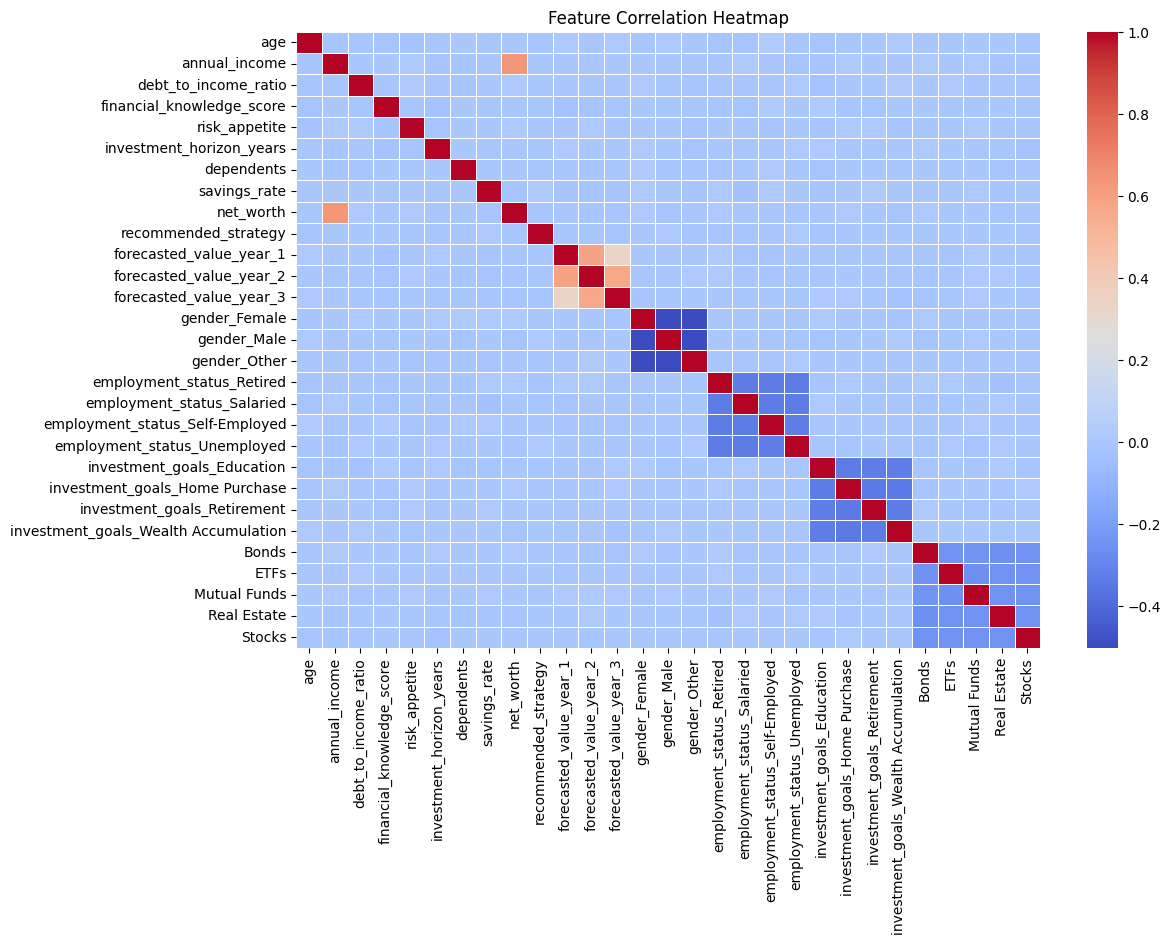

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load processed dataset
processed_file_path = "E:/Hackathon/processed_merged_data.csv"
processed_data = pd.read_csv(processed_file_path)

# Drop Non-Numeric Columns
processed_data_numeric = processed_data.select_dtypes(include=["number"])

# Compute Correlation Matrix
correlation_matrix = processed_data_numeric.corr()

# Plot Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [33]:
import pandas as pd
import numpy as np

# Load Data
file_path = "E:/Hackathon/processed_merged_data.csv"
data = pd.read_csv(file_path)

# Create Wealth Accumulation Score
data["wealth_score"] = np.log((data["net_worth"] + 1) / (data["annual_income"] + 1))

# Save Updated Data
processed_file_path = "E:/Hackathon/updated_data.csv"
data.to_csv(processed_file_path, index=False)

print("Feature engineering completed! Processed dataset saved at:", processed_file_path)


Feature engineering completed! Processed dataset saved at: E:/Hackathon/updated_data.csv


In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Processed Data
file_path = "E:/Hackathon/updated_data.csv"
data = pd.read_csv(file_path)

# Separate Features (X) and Target (y) (Assuming `recommended_strategy` is already encoded)
X = data.drop(columns=["recommended_strategy", "client_id"])  # Features
y = data["recommended_strategy"]  # Encoded Target variable

# Split Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize & Train Classifier
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Accuracy: 0.51

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       393
           1       0.52      0.96      0.67      1039
           2       0.28      0.04      0.07       568

    accuracy                           0.51      2000
   macro avg       0.27      0.33      0.25      2000
weighted avg       0.35      0.51      0.37      2000


Confusion Matrix:
[[  0 379  14]
 [  1 996  42]
 [  2 544  22]]


In [39]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\program files\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached tensorflow-2.19.0-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
Using cached tensorflow-2.19.0-cp311-cp311-win_amd64.whl (375.9 MB)


In [105]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = "E:/Hackathon/updated_data.csv"  # Update path if necessary
updated_data = pd.read_csv(file_path)

# Drop non-numeric columns (if 'client_id' exists)
if 'client_id' in updated_data.columns:
    updated_data = updated_data.drop(columns=["client_id"])

# Define features and target
X = updated_data.drop(columns=["recommended_strategy"])
# X = updated_data
y = updated_data["recommended_strategy"]

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define neural network model
model = Sequential([
    Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(len(y.unique()), activation="softmax")  # Output layer with softmax for multi-class classification
])

# Compile model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


C:\Users\Shivali\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4448 - loss: 1.0937 - val_accuracy: 0.5015 - val_loss: 1.0353
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4993 - loss: 1.0313 - val_accuracy: 0.5030 - val_loss: 1.0313
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4950 - loss: 1.0333 - val_accuracy: 0.5035 - val_loss: 1.0317
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4960 - loss: 1.0254 - val_accuracy: 0.5030 - val_loss: 1.0322
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5009 - loss: 1.0232 - val_accuracy: 0.5040 - val_loss: 1.0318
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4997 - loss: 1.0178 - val_accuracy: 0.5035 - val_loss: 1.0309
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5090 - loss: 1.0126 - val_accuracy: 0.5045 - val_loss: 1.0314
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5079 - loss: 1.0116 - val_accuracy: 0.

In [44]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   -- ------------------------------------- 10.5/150.0 MB 50.4 MB/s eta 0:00:03
   ----- ---------------------------------- 22.0/150.0 MB 53.6 MB/s eta 0:00:03
   -------- ------------------------------- 33.0/150.0 MB 52.4 MB/s eta 0:00:03
   ----------- ---------------------------- 43.5/150.0 MB 52.2 MB/s eta 0:00:03
   -------------- ------------------------- 55.3/150.0 MB 53.4 MB/s eta 0:00:02
   ---------------- ----------------------- 62.9/150.0 MB 50.1 MB/s eta 0:00:02
   ------------------ --------------------- 70.5/150.0 MB 48.4 MB/s eta 0:00:02
   -------------------- ------------------- 77.1/150.0 MB 46.4 MB/s eta 0:00:02
   ---------------------- ----------------- 84.7/150.0 MB 45.0 MB/s eta 0:00:02
   ------------------------ --------------- 92.5/150.0 MB 44.4 MB

DEPRECATION: Loading egg at c:\program files\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


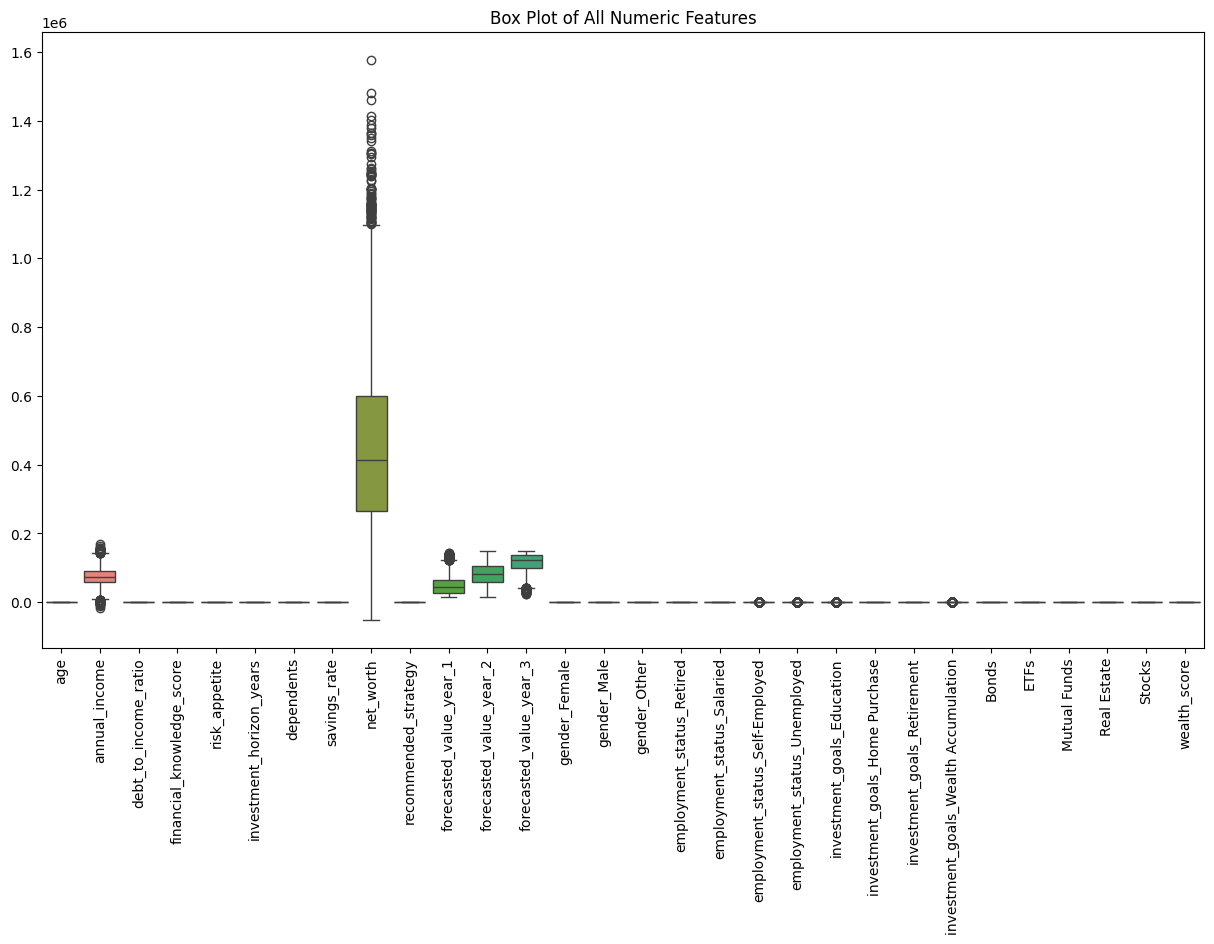

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "E:/Hackathon/updated_data.csv"  # Update the path if necessary
updated_data = pd.read_csv(file_path)

# Drop non-numeric columns if any
if 'client_id' in updated_data.columns:
    updated_data = updated_data.drop(columns=["client_id"])

# Set figure size
plt.figure(figsize=(15, 8))

# Create box plot
sns.boxplot(data=updated_data)
plt.xticks(rotation=90)  # Rotate x labels for better visibility
plt.title("Box Plot of All Numeric Features")
plt.show()


In [46]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load dataset
file_path = "E:/Hackathon/updated_data.csv"  # Update path if needed
updated_data = pd.read_csv(file_path)

# Define columns to normalize
columns_to_normalize = ["annual_income", "net_worth"]

# Apply Min-Max Normalization only to selected columns
scaler = MinMaxScaler()
updated_data[columns_to_normalize] = scaler.fit_transform(updated_data[columns_to_normalize])

# Save the normalized dataset
normalized_file_path = "E:/Hackathon/normalized_income_networth.csv"
updated_data.to_csv(normalized_file_path, index=False)

print(f"Normalization complete! Normalized dataset saved at {normalized_file_path}")


Normalization complete! Normalized dataset saved at E:/Hackathon/normalized_income_networth.csv


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
file_path = "E:/Hackathon/normalized_income_networth.csv"
data = pd.read_csv(file_path)

# Define target variable and features
target_column = "recommended_strategy"
X = data.drop(columns=[target_column, "client_id"])  # Features
y = data[target_column]  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Random Forest Accuracy: 0.4960
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       393
           1       0.50      0.97      0.66      1006
           2       0.28      0.03      0.05       601

    accuracy                           0.50      2000
   macro avg       0.26      0.33      0.24      2000
weighted avg       0.34      0.50      0.35      2000



C:\Users\Shivali\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Shivali\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Shivali\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [50]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
file_path = "E:/Hackathon/normalized_income_networth.csv"
data = pd.read_csv(file_path)

# Define target variable and features
target_column = "recommended_strategy"
X = data.drop(columns=[target_column, "client_id"])  # Features
y = data[target_column]  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the XGBoost Classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


XGBoost Accuracy: 0.4830
Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.02      0.03       393
           1       0.50      0.90      0.64      1006
           2       0.32      0.10      0.15       601

    accuracy                           0.48      2000
   macro avg       0.35      0.34      0.27      2000
weighted avg       0.39      0.48      0.37      2000



In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
file_path = "E:/Hackathon/time_static.csv"
data = pd.read_csv(file_path)

# Define target variable and features
target_column = "recommended_strategy"
X = data.drop(columns=[target_column, "client_id"])  # Features
y = data[target_column]  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Random Forest Accuracy: 0.5020
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       393
           1       0.50      1.00      0.67      1006
           2       0.00      0.00      0.00       601

    accuracy                           0.50      2000
   macro avg       0.17      0.33      0.22      2000
weighted avg       0.25      0.50      0.34      2000



C:\Users\Shivali\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Shivali\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Shivali\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [55]:
import pandas as pd

# Load time-series dataset
time_series_path = "E:/Hackathon/time_series_data.csv"
time_series_data = pd.read_csv(time_series_path)

# Aggregate monthly_contribution per client
contribution_features = time_series_data.groupby("client_id").agg(
    monthly_contribution_min=("monthly_contribution", "min"),
    monthly_contribution_max=("monthly_contribution", "max"),
    monthly_contribution_mean=("monthly_contribution", "mean"),
    monthly_contribution_total=("monthly_contribution", "sum")
).reset_index()

# Save the aggregated features
agg_file_path = "E:/Hackathon/contribution_features.csv"
contribution_features.to_csv(agg_file_path, index=False)
print("Aggregated monthly_contribution features saved!")


Aggregated monthly_contribution features saved!


In [56]:
# Load static and target data
static_data_path = "E:/Hackathon/updated_data.csv"  # Processed Static + Target Data
static_data = pd.read_csv(static_data_path)

# Merge static + aggregated contribution features
merged_data = static_data.merge(contribution_features, on="client_id", how="left")

# Save the final dataset
final_file_path = "E:/Hackathon/final_merged_data.csv"
merged_data.to_csv(final_file_path, index=False)

print("Final dataset with monthly_contribution features saved!")


Final dataset with monthly_contribution features saved!


In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = "E:/Hackathon/final_merged_data.csv"  # Update path if needed
data = pd.read_csv(file_path)

# Separate features and target
X = data.drop(columns=["recommended_strategy", "client_id"])  # Features
y = data["recommended_strategy"]  # Target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50, stratify=y)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=50)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.5055
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       393
           1       0.51      0.98      0.67      1006
           2       0.48      0.04      0.07       601

    accuracy                           0.51      2000
   macro avg       0.33      0.34      0.25      2000
weighted avg       0.40      0.51      0.36      2000



In [61]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Load the dataset
file_path = "E:/Hackathon/final_merged_data.csv"  # Update if needed
data = pd.read_csv(file_path)

# Separate features and target
X = data.drop(columns=["recommended_strategy", "client_id"])  # Features
y = data["recommended_strategy"]  # Target

# One-Hot Encode the Target Variable
y = pd.get_dummies(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50, stratify=y)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define Neural Network Model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(y_train.shape[1], activation='softmax')  # Output layer (multi-class)
])

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluate Model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test.values, axis=1)

print("Classification Report:\n", classification_report(y_true, y_pred_classes))


C:\Users\Shivali\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.4520 - loss: 1.0909 - val_accuracy: 0.5000 - val_loss: 1.0332
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4975 - loss: 1.0331 - val_accuracy: 0.5025 - val_loss: 1.0319
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5079 - loss: 1.0223 - val_accuracy: 0.5025 - val_loss: 1.0318
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5017 - loss: 1.0244 - val_accuracy: 0.5025 - val_loss: 1.0334
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5019 - loss: 1.0201 - val_accuracy: 0.5025 - val_loss: 1.0348
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       393
           1       0.50      1.00      0.67      1005
           2       0.25      0.00      0.00       602

    accuracy                           0.50      2000
   macro avg       0.25      0

C:\Users\Shivali\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Shivali\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Shivali\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [64]:
import pandas as pd

# Load time series data
time_series_path = "E:/Hackathon/time_series_data.csv"
time_series_data = pd.read_csv(time_series_path)

# Ensure the data is sorted for rolling calculations
time_series_data['month'] = pd.to_datetime(time_series_data['month'])  # Convert to datetime if not already
time_series_data = time_series_data.sort_values(by=['client_id', 'month'])

# Compute Aggregated Features
aggregated_features = time_series_data.groupby("client_id")["monthly_contribution"].agg([
    'min', 'max', 'mean', 'sum', 'std'  # Standard deviation (volatility)
]).rename(columns={'std': 'volatility'})

# Compute Rolling Averages (Trend Analysis)
time_series_data["rolling_avg_3m"] = time_series_data.groupby("client_id")["monthly_contribution"].transform(lambda x: x.rolling(3, min_periods=1).mean())
time_series_data["rolling_avg_6m"] = time_series_data.groupby("client_id")["monthly_contribution"].transform(lambda x: x.rolling(6, min_periods=1).mean())
time_series_data["rolling_avg_12m"] = time_series_data.groupby("client_id")["monthly_contribution"].transform(lambda x: x.rolling(12, min_periods=1).mean())

# Compute Percentile Changes (Captures jumps in contributions)
time_series_data["pct_change"] = time_series_data.groupby("client_id")["monthly_contribution"].pct_change()

# Aggregate Rolling Features (Take the last available rolling average per client)
rolling_features = time_series_data.groupby("client_id")[
    ["rolling_avg_3m", "rolling_avg_6m", "rolling_avg_12m", "pct_change"]
].last()

# Merge All Features
final_features = aggregated_features.merge(rolling_features, on="client_id")

# Load Updated Data
updated_data_path = "E:/Hackathon/updated_data.csv"
updated_data = pd.read_csv(updated_data_path)

# Merge with Updated Data
merged_data = updated_data.merge(final_features, on="client_id", how="left")

# Save Processed Data
processed_file_path = "E:/Hackathon/enhanced_updated_data.csv"
merged_data.to_csv(processed_file_path, index=False)

print(f"✅ Feature engineering completed! Processed dataset saved at {processed_file_path}")


✅ Feature engineering completed! Processed dataset saved at E:/Hackathon/enhanced_updated_data.csv


In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the enhanced dataset
file_path = "E:/Hackathon/enhanced_updated_data.csv"
data = pd.read_csv(file_path)

# Drop unnecessary columns
X = data.drop(columns=["recommended_strategy", "client_id"])  # Features
y = data["recommended_strategy"]  # Target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, min_samples_split=5, class_weight="balanced")
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("✅ Accuracy:", accuracy)
print("✅ Classification Report:\n", classification_rep)


✅ Accuracy: 0.427
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.13      0.16       393
           1       0.52      0.64      0.58      1006
           2       0.31      0.26      0.28       601

    accuracy                           0.43      2000
   macro avg       0.34      0.34      0.34      2000
weighted avg       0.39      0.43      0.41      2000



In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the enhanced dataset
file_path = "E:/Hackathon/updated_data.csv"
data = pd.read_csv(file_path)

# Drop unnecessary columns
X = data.drop(columns=["recommended_strategy", "client_id"])  # Features
y = data["recommended_strategy"]  # Target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=10, min_samples_split=5, class_weight="balanced")
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("✅ Accuracy:", accuracy)
print("✅ Classification Report:\n", classification_rep)


✅ Accuracy: 0.4395
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.11      0.14       393
           1       0.51      0.70      0.59      1006
           2       0.30      0.22      0.25       601

    accuracy                           0.44      2000
   macro avg       0.34      0.34      0.33      2000
weighted avg       0.39      0.44      0.40      2000



In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = "E:/Hackathon/updated_data.csv"  # Update path if needed
data = pd.read_csv(file_path)

# Define features and target variable
selected_features = [
    "age", "employment_status_Retired", "debt_to_income_ratio", "annual_income", 
    "financial_knowledge_score", "risk_appetite", 'investment_goals_Education', 'investment_goals_Home Purchase', 'investment_goals_Retirement', 'investment_goals_Wealth Accumulation',
    "investment_horizon_years", "net_worth", "dependents", "employment_status_Salaried", 'employment_status_Self-Employed', 'employment_status_Unemployed',
]
X = data[selected_features]  # Select only relevant features
y = data["recommended_strategy"]  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=10, min_samples_split=5, class_weight="balanced")
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print results
print("✅ Accuracy:", accuracy)
print("✅ Classification Report:\n", classification_rep)


✅ Accuracy: 0.408
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.15      0.17       393
           1       0.51      0.61      0.55      1006
           2       0.30      0.24      0.27       601

    accuracy                           0.41      2000
   macro avg       0.33      0.33      0.33      2000
weighted avg       0.38      0.41      0.39      2000



In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = "E:/Hackathon/updated_data.csv"  # Update path if needed
data = pd.read_csv(file_path)

# Drop client_id if it exists
if "client_id" in data.columns:
    data = data.drop(columns=["client_id"])

# Separate features and target variable
X = data.drop(columns=["recommended_strategy"])  # Features
y = data["recommended_strategy"]  # Target

# Scale numerical features (SVM works better with standardized data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train an SVM Classifier
svm_model = SVC(kernel="rbf", C=1.0, gamma="scale", class_weight="balanced", random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print results
print("✅ Accuracy:", accuracy)
print("✅ Classification Report:\n", classification_rep)


✅ Accuracy: 0.348
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.32      0.25       393
           1       0.50      0.37      0.43      1006
           2       0.31      0.33      0.32       601

    accuracy                           0.35      2000
   macro avg       0.34      0.34      0.33      2000
weighted avg       0.38      0.35      0.36      2000



In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = "E:/Hackathon/updated_data.csv"  # Update path if needed
data = pd.read_csv(file_path)

# Drop client_id if it exists
if "client_id" in data.columns:
    data = data.drop(columns=["client_id"])

# Separate features and target variable
X = data.drop(columns=["recommended_strategy"])  # Features
y = data["recommended_strategy"]  # Target

# Scale numerical features (Logistic Regression requires scaling for optimal performance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train a Logistic Regression Classifier
log_model = LogisticRegression(max_iter=500, class_weight="balanced", random_state=42)
log_model.fit(X_train, y_train)

# Make predictions
y_pred = log_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print results
print("✅ Accuracy:", accuracy)
print("✅ Classification Report:\n", classification_rep)


✅ Accuracy: 0.299
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.36      0.24       393
           1       0.50      0.27      0.35      1006
           2       0.28      0.31      0.29       601

    accuracy                           0.30      2000
   macro avg       0.32      0.31      0.29      2000
weighted avg       0.37      0.30      0.31      2000



In [103]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the dataset
file_path = "E:/Hackathon/updated_data.csv"
data = pd.read_csv(file_path)

# Separate features and target
X = data.drop(columns=["recommended_strategy", "client_id"])
y = data["recommended_strategy"]

# Normalize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert target to categorical (One-Hot Encoding)
y_encoded = pd.get_dummies(y).values  # Convert categorical target to one-hot

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y)

# Build MLP Model
model = Sequential([
    Dense(448, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(244, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')  # Output layer (multi-class)
])

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {accuracy:.4f}")


C:\Users\Shivali\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4626 - loss: 1.0702 - val_accuracy: 0.5030 - val_loss: 1.0338
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5011 - loss: 1.0240 - val_accuracy: 0.4965 - val_loss: 1.0430
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4970 - loss: 1.0209 - val_accuracy: 0.5020 - val_loss: 1.0347
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5066 - loss: 1.0095 - val_accuracy: 0.4985 - val_loss: 1.0391
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5121 - loss: 1.0079 - val_accuracy: 0.4900 - val_loss: 1.0463
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5104 - loss: 0.9979 - val_accuracy: 0.4835 - val_loss: 1.0509
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5095 - loss: 0.9943 - val_accuracy: 0.4920 - val_loss: 1.0562
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5204 - loss: 0.9815 - val_accuracy: 0.

In [102]:
X_train.shape

(8000, 29)